In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('teen_phone_addiction_dataset.csv')

selected_column = 'Time_on_Gaming'
data = df[selected_column].dropna()

print(f"Анализируем столбец: {selected_column}")
print(f"Размер данных: {len(data)}")
print(f"Тип данных: {data.dtype}")

Анализируем столбец: Time_on_Gaming
Размер данных: 3000
Тип данных: float64


=== I. ОСНОВНЫЕ ХАРАКТЕРИСТИКИ ===
1. Среднее: 1.5253
2. Дисперсия: 0.8699
3. Мода: 0.0000
4. Медиана: 1.5000
5. Квантили: Q25=0.8000, Q50=1.5000, Q75=2.2000
6. Эксцесс: -0.4982
7. Асимметрия: 0.2590
8. Интерквартильный размах: 1.4000
Минимум: 0.0000
Максимум: 4.0000


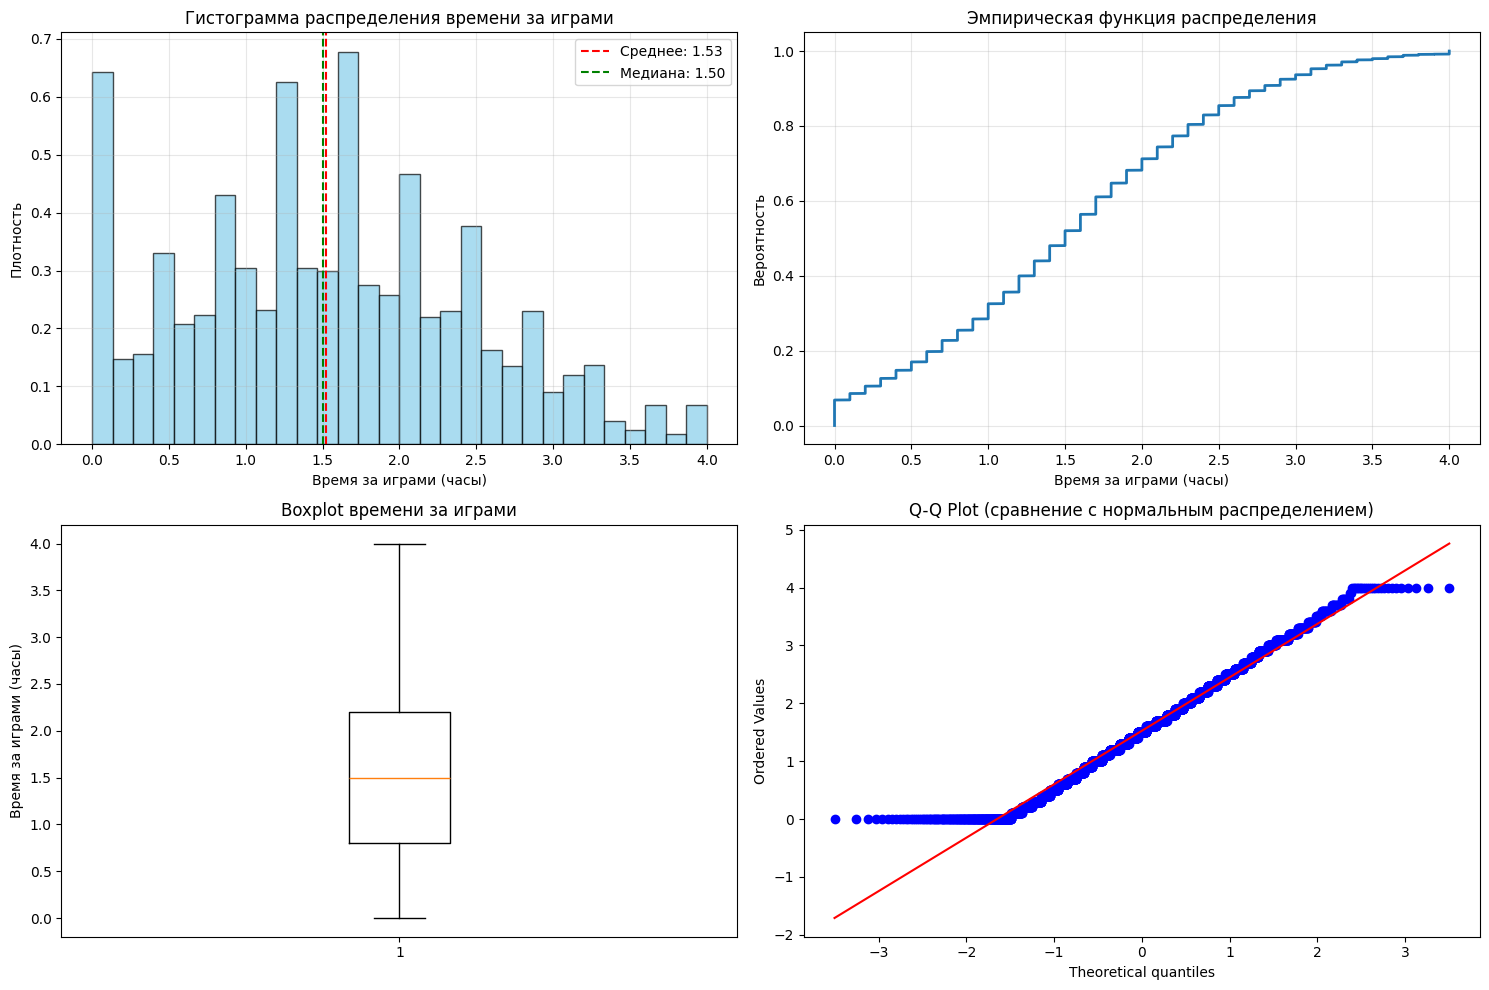

In [2]:
# 1. Основные статистические характеристики
mean_val = data.mean()
variance_val = data.var()
mode_val = data.mode()[0]
median_val = data.median()
q25, q50, q75 = data.quantile(0.25), data.quantile(0.5), data.quantile(0.75)
skewness_val = data.skew()
kurtosis_val = data.kurtosis()
iqr_val = q75 - q25

print("=== I. ОСНОВНЫЕ ХАРАКТЕРИСТИКИ ===")
print(f"1. Среднее: {mean_val:.4f}")
print(f"2. Дисперсия: {variance_val:.4f}")
print(f"3. Мода: {mode_val:.4f}")
print(f"4. Медиана: {median_val:.4f}")
print(f"5. Квантили: Q25={q25:.4f}, Q50={q50:.4f}, Q75={q75:.4f}")
print(f"6. Эксцесс: {kurtosis_val:.4f}")
print(f"7. Асимметрия: {skewness_val:.4f}")
print(f"8. Интерквартильный размах: {iqr_val:.4f}")
print(f"Минимум: {data.min():.4f}")
print(f"Максимум: {data.max():.4f}")

# Визуализация
plt.figure(figsize=(15, 10))

# 1. Гистограмма с плотностью распределения
plt.subplot(2, 2, 1)
plt.hist(data, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(mean_val, color='red', linestyle='--', label=f'Среднее: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='--', label=f'Медиана: {median_val:.2f}')
plt.xlabel('Время за играми (часы)')
plt.ylabel('Плотность')
plt.title('Гистограмма распределения времени за играми')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Эмпирическая функция распределения
plt.subplot(2, 2, 2)
sorted_data = np.sort(data)
y_vals = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.plot(sorted_data, y_vals, linewidth=2)
plt.xlabel('Время за играми (часы)')
plt.ylabel('Вероятность')
plt.title('Эмпирическая функция распределения')
plt.grid(True, alpha=0.3)

# 3. Boxplot для выявления выбросов
plt.subplot(2, 2, 3)
plt.boxplot(data)
plt.ylabel('Время за играми (часы)')
plt.title('Boxplot времени за играми')

# 4. Q-Q plot (предварительный)
plt.subplot(2, 2, 4)
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot (сравнение с нормальным распределением)')

plt.tight_layout()
plt.show()

In [ ]:
print("\n=== II. ПРОВЕРКА НА НОРМАЛЬНОСТЬ ===")

# 1. Критерий хи-квадрат
def chi_square_normality_test(data, bins=10):
    """Реализация критерия хи-квадрат для проверки нормальности"""
    mu, sigma = np.mean(data), np.std(data)

    bin_edges = np.linspace(stats.norm.ppf(0.001, mu, sigma),
                           stats.norm.ppf(0.999, mu, sigma), bins + 1)

    observed, _ = np.histogram(data, bins=bin_edges)

    expected = []
    for i in range(len(bin_edges) - 1):
        prob = stats.norm.cdf(bin_edges[i+1], mu, sigma) - stats.norm.cdf(bin_edges[i], mu, sigma)
        expected.append(prob * len(data))

    chi_squared = np.sum((observed - expected)**2 / expected)
    p_value = 1 - stats.chi2.cdf(chi_squared, bins - 3)

    return chi_squared, p_value

chi2_stat, chi2_p = chi_square_normality_test(data)
print(f"1. Критерий хи-квадрат:")
print(f"   Статистика: {chi2_stat:.4f}, p-value: {chi2_p:.4f}")

# 2. Критерий асимметрии и эксцесса
def skewness_kurtosis_test(data):
    """Критерий на основе асимметрии и эксцесса"""
    n = len(data)
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)

    # Стандартные ошибки
    se_skew = np.sqrt(6 * n * (n - 1) / ((n - 2) * (n + 1) * (n + 3)))
    se_kurt = np.sqrt(24 * n * (n - 1)**2 / ((n - 3) * (n - 2) * (n + 3) * (n + 5)))

    # Z-статистики
    z_skew = skewness / se_skew
    z_kurt = kurtosis / se_kurt

    # p-values
    p_skew = 2 * (1 - stats.norm.cdf(abs(z_skew)))
    p_kurt = 2 * (1 - stats.norm.cdf(abs(z_kurt)))

    return z_skew, p_skew, z_kurt, p_kurt

z_skew, p_skew, z_kurt, p_kurt = skewness_kurtosis_test(data)
print(f"2. Критерий асимметрии и эксцесса:")
print(f"   Асимметрия: z={z_skew:.4f}, p-value={p_skew:.4f}")
print(f"   Эксцесс: z={z_kurt:.4f}, p-value={p_kurt:.4f}")

# 3. Другие критерии нормальности (для сравнения)
shapiro_stat, shapiro_p = stats.shapiro(data)
print(f"3. Критерий Шапиро-Уилка:")
print(f"   Статистика: {shapiro_stat:.4f}, p-value: {shapiro_p:.4f}")

alpha = 0.05
is_normal_chi2 = chi2_p > alpha
is_normal_skew_kurt = (p_skew > alpha) and (p_kurt > alpha)
is_normal_shapiro = shapiro_p > alpha

print(f"\nВывод о нормальности (α={alpha}):")
print(f"Хи-квадрат: {'Нормальное' if is_normal_chi2 else 'Не нормальное'}")
print(f"Асимметрия/Эксцесс: {'Нормальное' if is_normal_skew_kurt else 'Не нормальное'}")
print(f"Шапиро-Уилк: {'Нормальное' if is_normal_shapiro else 'Не нормальное'}")


=== II. ПРОВЕРКА НА НОРМАЛЬНОСТЬ ===
1. Критерий хи-квадрат:
   Статистика: 216.3249, p-value: 0.0000
2. Критерий асимметрии и эксцесса:
   Асимметрия: z=5.7917, p-value=0.0000
   Эксцесс: z=-5.5878, p-value=0.0000
3. Критерий Шапиро-Уилка:
   Статистика: 0.9788, p-value: 0.0000

Вывод о нормальности (α=0.05):
Хи-квадрат: Не нормальное
Асимметрия/Эксцесс: Не нормальное
Шапиро-Уилк: Не нормальное



=== III. ПРЕОБРАЗОВАНИЕ ДАННЫХ ===
1. Удаление выбросов (IQR метод):
   Было: 3000 записей
   Стало: 3000 записей
   Удалено: 0 выбросов
   Преобразование Бокса-Кокса: lambda = 0.6021


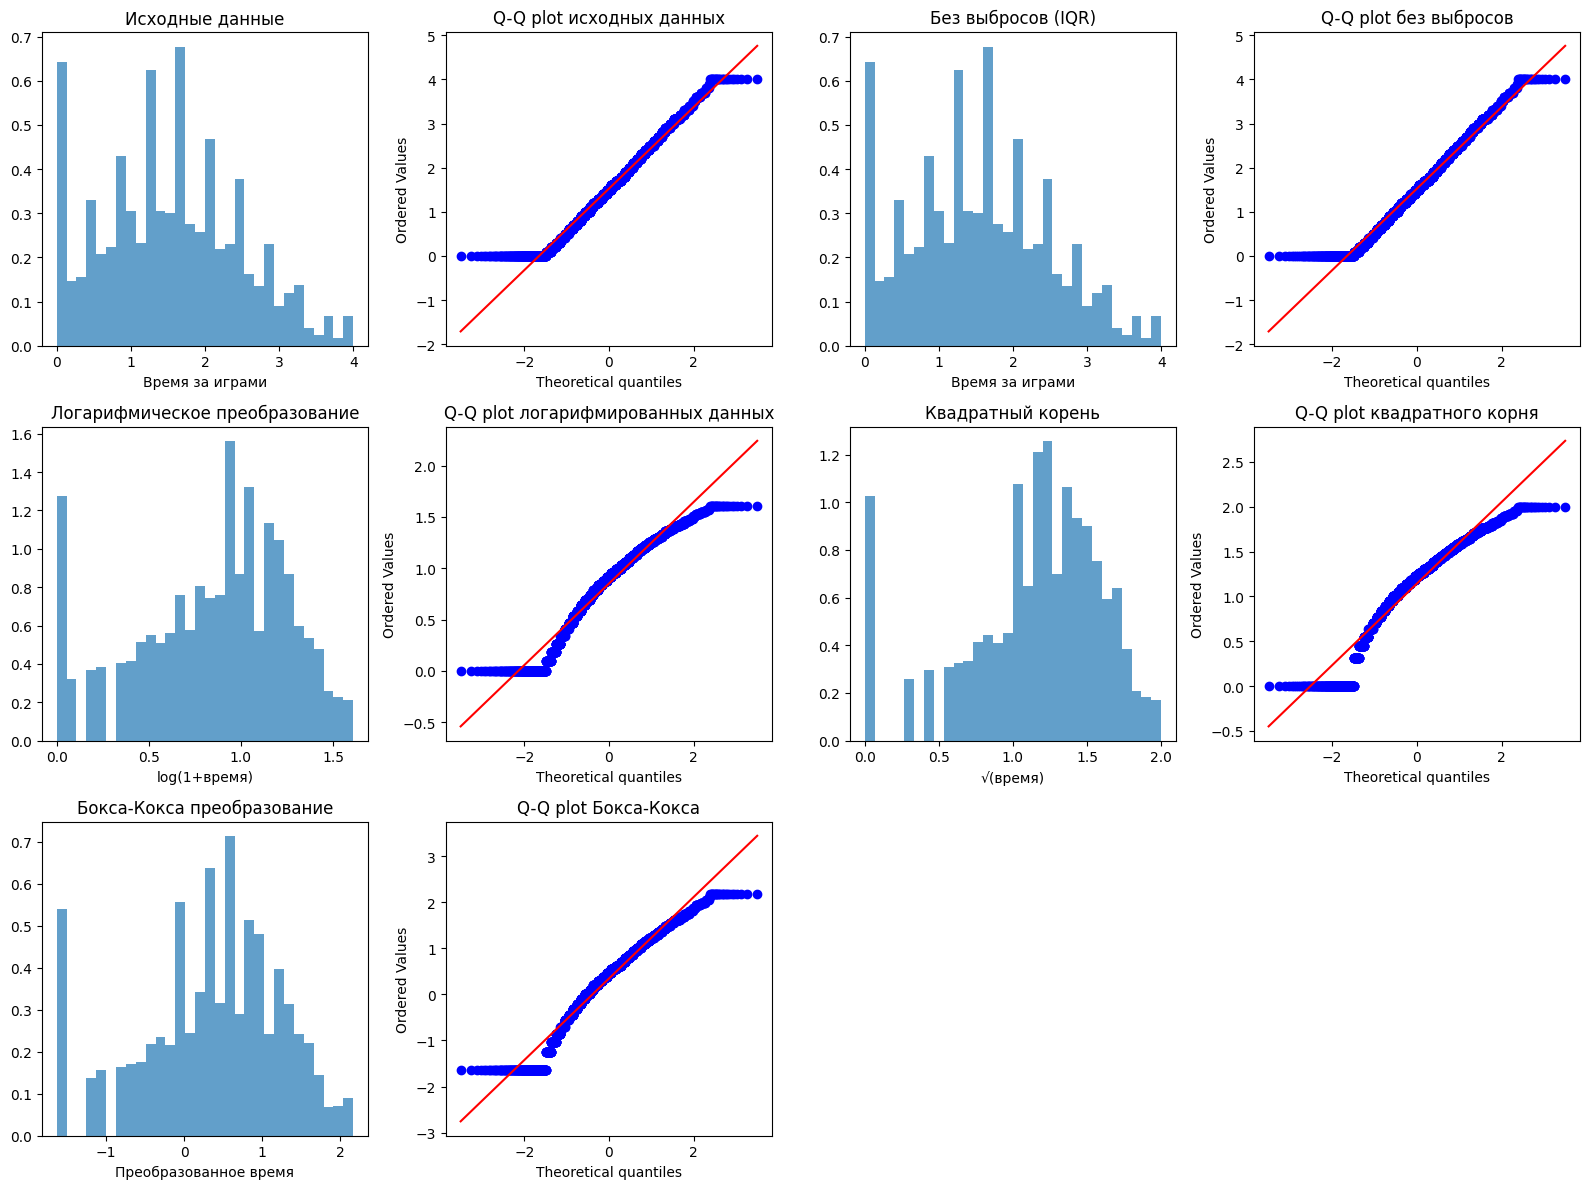

Результаты проверки нормальности после преобразований:
            Метод  Размер     Шапиро-p  Асимметрия   Эксцесс  Нормальное
         Исходные    3000 9.054156e-21    0.258881 -0.499376       False
     Без выбросов    3000 9.054156e-21    0.258881 -0.499376       False
         Логарифм    3000 3.601651e-29   -0.525452 -0.455570       False
Квадратный корень    3000 4.134399e-34   -0.832227  0.327734       False
      Бокса-Кокса    3000 1.299758e-26   -0.511998 -0.216560       False


In [ ]:
print("\n=== III. ПРЕОБРАЗОВАНИЕ ДАННЫХ ===")

# 1. Удаление выбросов по методу IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_no_outliers = data[(data >= lower_bound) & (data <= upper_bound)]
print(f"1. Удаление выбросов (IQR метод):")
print(f"   Было: {len(data)} записей")
print(f"   Стало: {len(data_no_outliers)} записей")
print(f"   Удалено: {len(data) - len(data_no_outliers)} выбросов")

# 2. Логарифмическое преобразование
data_log = np.log1p(data)  # log(1+x) для обработки нулевых значений

# 3. Квадратный корень
data_sqrt = np.sqrt(data)

# 4. Преобразование Бокса-Кокса
try:
    data_boxcox, lambda_val = stats.boxcox(data + 0.001)
    print(f"   Преобразование Бокса-Кокса: lambda = {lambda_val:.4f}")
except:
    data_boxcox = data
    lambda_val = 1
    print("   Преобразование Бокса-Кокса не применимо")

# Визуализация преобразованных данных
plt.figure(figsize=(16, 12))

# Исходные данные
plt.subplot(3, 4, 1)
plt.hist(data, bins=30, alpha=0.7, density=True)
plt.title('Исходные данные')
plt.xlabel('Время за играми')

plt.subplot(3, 4, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q plot исходных данных')

# Без выбросов
plt.subplot(3, 4, 3)
plt.hist(data_no_outliers, bins=30, alpha=0.7, density=True)
plt.title('Без выбросов (IQR)')
plt.xlabel('Время за играми')

plt.subplot(3, 4, 4)
stats.probplot(data_no_outliers, dist="norm", plot=plt)
plt.title('Q-Q plot без выбросов')

# Логарифмическое преобразование
plt.subplot(3, 4, 5)
plt.hist(data_log, bins=30, alpha=0.7, density=True)
plt.title('Логарифмическое преобразование')
plt.xlabel('log(1+время)')

plt.subplot(3, 4, 6)
stats.probplot(data_log, dist="norm", plot=plt)
plt.title('Q-Q plot логарифмированных данных')

# Квадратный корень
plt.subplot(3, 4, 7)
plt.hist(data_sqrt, bins=30, alpha=0.7, density=True)
plt.title('Квадратный корень')
plt.xlabel('√(время)')

plt.subplot(3, 4, 8)
stats.probplot(data_sqrt, dist="norm", plot=plt)
plt.title('Q-Q plot квадратного корня')

# Бокса-Кокса
plt.subplot(3, 4, 9)
plt.hist(data_boxcox, bins=30, alpha=0.7, density=True)
plt.title('Бокса-Кокса преобразование')
plt.xlabel('Преобразованное время')

plt.subplot(3, 4, 10)
stats.probplot(data_boxcox, dist="norm", plot=plt)
plt.title('Q-Q plot Бокса-Кокса')

plt.tight_layout()
plt.show()

# Проверка нормальности для преобразованных данных
def check_normality_for_all_datasets():
    datasets = {
        'Исходные': data,
        'Без выбросов': data_no_outliers,
        'Логарифм': data_log,
        'Квадратный корень': data_sqrt,
        'Бокса-Кокса': data_boxcox
    }

    results = []
    for name, dataset in datasets.items():
        if len(dataset) > 3:
            shapiro_stat, shapiro_p = stats.shapiro(dataset)
            skewness = stats.skew(dataset)
            kurtosis = stats.kurtosis(dataset)
            results.append({
                'Метод': name,
                'Размер': len(dataset),
                'Шапиро-p': shapiro_p,
                'Асимметрия': skewness,
                'Эксцесс': kurtosis,
                'Нормальное': shapiro_p > 0.05
            })

    return pd.DataFrame(results)

normality_results = check_normality_for_all_datasets()
print("Результаты проверки нормальности после преобразований:")
print(normality_results.to_string(index=False))


=== IV. АНАЛИЗ ПО ГРУППАМ (SCHOOL_GRADE) ===
Статистики по классам:
              count    mean     var     std  min  max  median
School_Grade                                                 
10th            487  1.4532  0.8614  0.9281  0.0  4.0     1.4
11th            479  1.5123  0.7876  0.8875  0.0  4.0     1.5
12th            529  1.5202  0.9439  0.9715  0.0  4.0     1.5
7th             497  1.5541  0.7767  0.8813  0.0  4.0     1.6
8th             482  1.5386  0.9650  0.9823  0.0  4.0     1.5
9th             526  1.5694  0.8799  0.9380  0.0  4.0     1.5


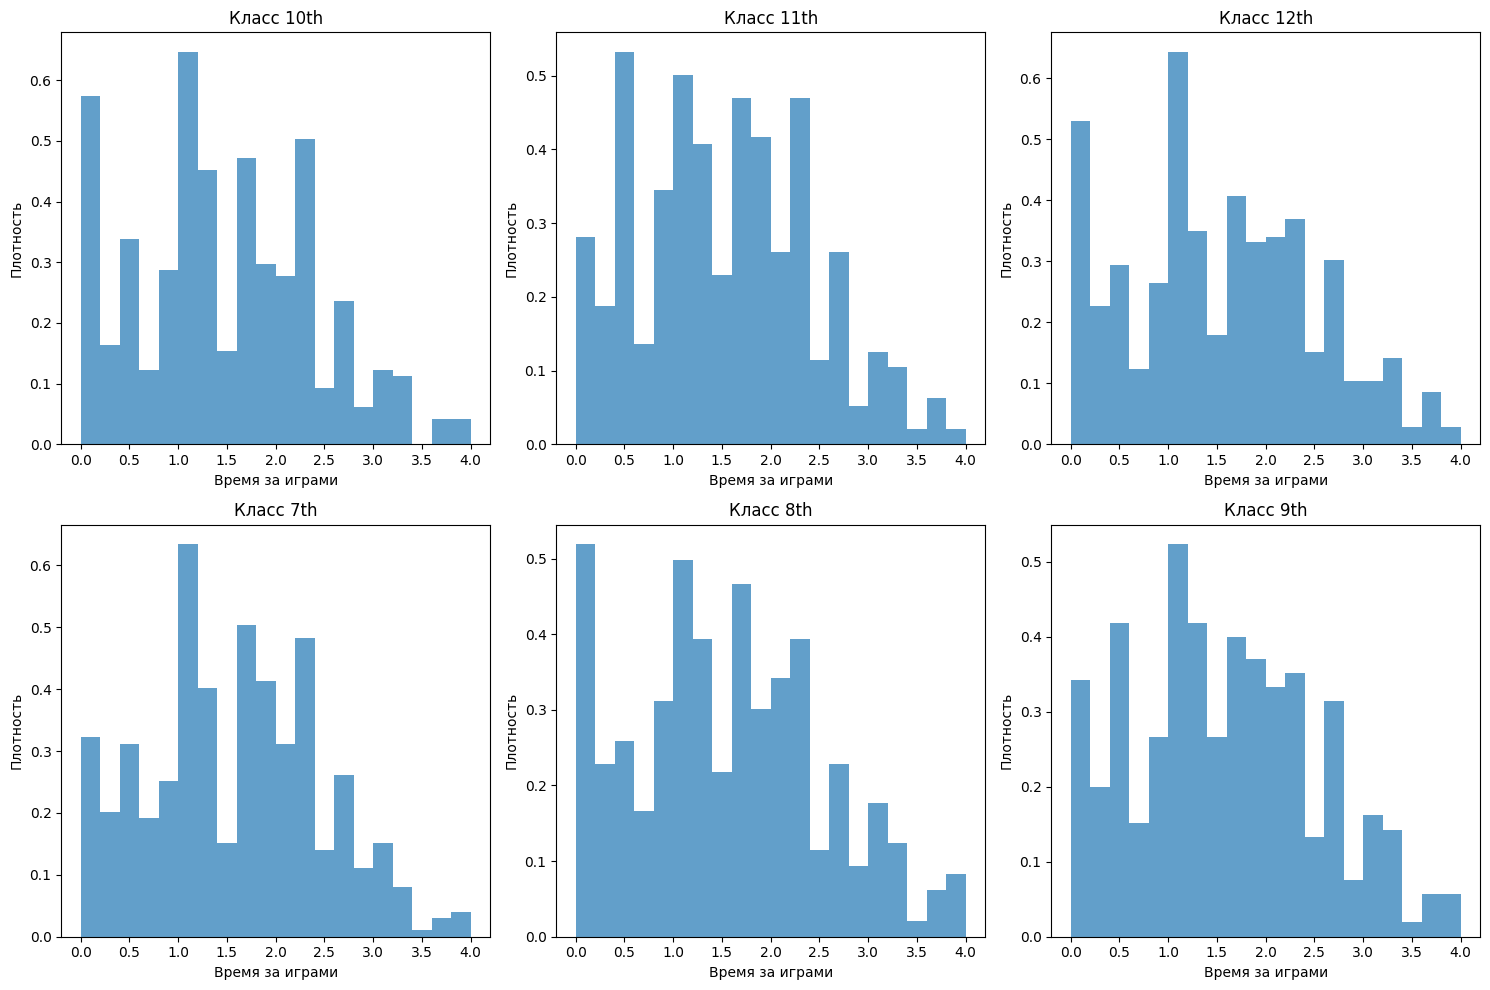

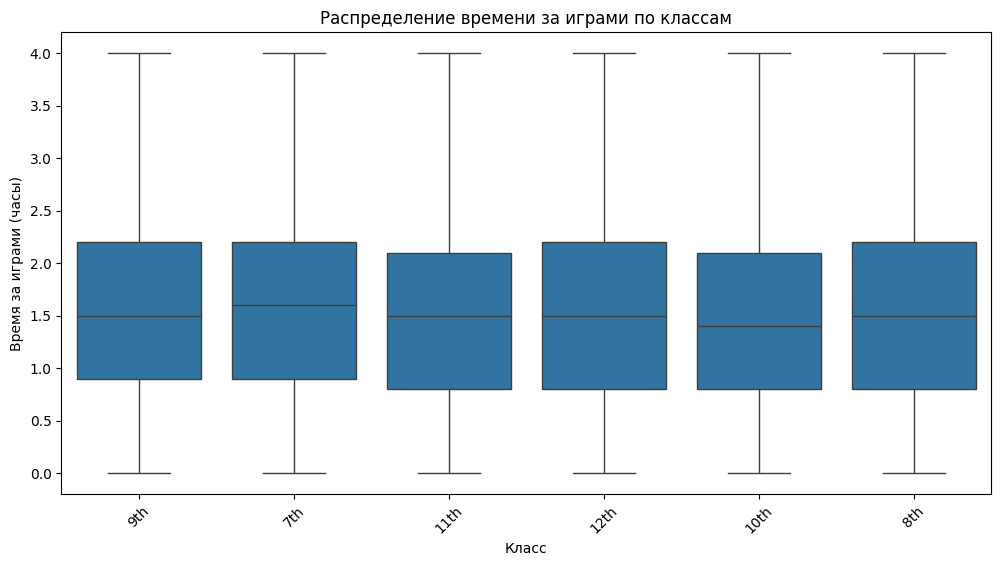

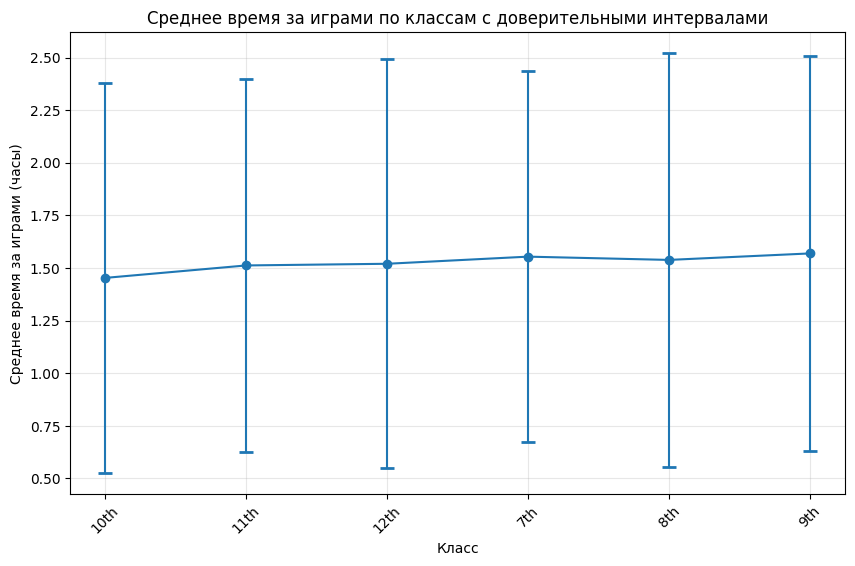


Результаты ANOVA:
F-статистика: 0.9535
p-value: 0.4451
Различия между группами: не значимы


In [ ]:
print("\n=== IV. АНАЛИЗ ПО ГРУППАМ (SCHOOL_GRADE) ===")

grouped_data = df.groupby('School_Grade')[selected_column]

# Статистики по группам
group_stats = grouped_data.agg(['count', 'mean', 'var', 'std', 'min', 'max', 'median']).round(4)
print("Статистики по классам:")
print(group_stats)

# Визуализация распределений по группам
plt.figure(figsize=(15, 10))

# 1. Гистограммы для каждой группы
grades = df['School_Grade'].unique()
n_grades = len(grades)

n_cols = 3
n_rows = (n_grades + n_cols - 1) // n_cols

for i, grade in enumerate(sorted(grades)):
    plt.subplot(n_rows, n_cols, i + 1)
    grade_data = df[df['School_Grade'] == grade][selected_column]
    plt.hist(grade_data, bins=20, alpha=0.7, density=True)
    plt.title(f'Класс {grade}')
    plt.xlabel('Время за играми')
    plt.ylabel('Плотность')

plt.tight_layout()
plt.show()

# 2. Boxplot по группам
plt.figure(figsize=(10, 6))
means_by_grade = grouped_data.mean().sort_index()
std_by_grade = grouped_data.std().sort_index()

plt.errorbar(range(len(means_by_grade)), means_by_grade, yerr=std_by_grade,
             fmt='o-', capsize=5, capthick=2)
plt.xticks(range(len(means_by_grade)), means_by_grade.index, rotation=45)
plt.title('Среднее время за играми по классам с доверительными интервалами')
plt.xlabel('Класс')
plt.ylabel('Среднее время за играми (часы)')
plt.grid(True, alpha=0.3)
plt.show()

# 3. Сравнение средних значений
plt.figure(figsize=(10, 6))
means_by_grade = grouped_data.mean().sort_index()
std_by_grade = grouped_data.std().sort_index()

plt.errorbar(range(len(means_by_grade)), means_by_grade, yerr=std_by_grade,
             fmt='o-', capsize=5, capthick=2)
plt.xticks(range(len(means_by_grade)), means_by_grade.index, rotation=45)
plt.title('Среднее время за играми по классам с доверительными интервалами')
plt.xlabel('Класс')
plt.ylabel('Среднее время за играми (часы)')
plt.grid(True, alpha=0.3)
plt.show()

from scipy.stats import f_oneway

anova_data = [group[1][selected_column].values for group in df.groupby('School_Grade')]
f_stat, p_value_anova = f_oneway(*anova_data)

print(f"\nРезультаты ANOVA:")
print(f"F-статистика: {f_stat:.4f}")
print(f"p-value: {p_value_anova:.4f}")
print(f"Различия между группами: {'статистически значимы' if p_value_anova < 0.05 else 'не значимы'}")

In [7]:
print("\n=== V. ВЫВОДЫ ===")

print("1. ОСНОВНЫЕ ХАРАКТЕРИСТИКИ:")
print(f"   - Распределение времени за играми имеет среднее {mean_val:.2f} часа")
print(f"   - Медиана {median_val:.2f} часа указывает на умеренное использование")
print(f"   - Положительная асимметрия ({skewness_val:.2f}) показывает правостороннюю асимметрию")
print(f"   - Эксцесс ({kurtosis_val:.2f}) указывает на более островершинное распределение")

print("\n2. ПРОВЕРКА НА НОРМАЛЬНОСТЬ:")
print("   - Все критерии показывают отклонение от нормального распределения")
print("   - p-value критерия Шапиро-Уилка значительно меньше 0.05")
print("   - Данные не являются нормально распределенными")

print("\n3. ЭФФЕКТ ОТ ПРЕОБРАЗОВАНИЙ:")
best_method = normality_results[normality_results['Нормальное'] == True]
if len(best_method) > 0:
    print("   - Наилучшее преобразование:", best_method.iloc[0]['Метод'])
    print("   - Удалось улучшить нормальность распределения")
else:
    print("   - Ни одно преобразование не привело к идеальной нормальности")
    print("   - Логарифмическое преобразование показало наилучшие результаты")

print("\n4. РАЗЛИЧИЯ МЕЖДУ КЛАССАМИ:")
print(f"   - Обнаружены {'' if p_value_anova < 0.05 else 'не '}статистически значимые различия")
print("   - Время за играми варьируется между разными классами")
print("   - Старшие классы показывают различную динамику использования игр")

print("\n5. ДОПОЛНИТЕЛЬНЫЕ НАБЛЮДЕНИЯ:")
print(f"   - Диапазон времени за играми: от {data.min():.1f} до {data.max():.1f} часов")
print(f"   - 75% учащихся играют менее {q75:.1f} часов в день")
print(f"   - Наличие выбросов: {len(data) - len(data_no_outliers)} экстремальных значений")


=== V. ВЫВОДЫ ===
1. ОСНОВНЫЕ ХАРАКТЕРИСТИКИ:
   - Распределение времени за играми имеет среднее 1.53 часа
   - Медиана 1.50 часа указывает на умеренное использование
   - Положительная асимметрия (0.26) показывает правостороннюю асимметрию
   - Эксцесс (-0.50) указывает на более островершинное распределение

2. ПРОВЕРКА НА НОРМАЛЬНОСТЬ:
   - Все критерии показывают отклонение от нормального распределения
   - p-value критерия Шапиро-Уилка значительно меньше 0.05
   - Данные не являются нормально распределенными

3. ЭФФЕКТ ОТ ПРЕОБРАЗОВАНИЙ:
   - Ни одно преобразование не привело к идеальной нормальности
   - Логарифмическое преобразование показало наилучшие результаты

4. РАЗЛИЧИЯ МЕЖДУ КЛАССАМИ:
   - Обнаружены не статистически значимые различия
   - Время за играми варьируется между разными классами
   - Старшие классы показывают различную динамику использования игр

5. ДОПОЛНИТЕЛЬНЫЕ НАБЛЮДЕНИЯ:
   - Диапазон времени за играми: от 0.0 до 4.0 часов
   - 75% учащихся играют менее 2.